In [2]:
# 배깅(회귀)
import pandas as pd

In [4]:
df = pd.read_csv('data/kc_house_data.csv')
df = df.drop(['id','date'], axis = 1)

X = df.drop(['price'], axis = 1)
y = df['price']

X = pd.get_dummies(data = X, columns = ['waterfront'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2021)

In [5]:
from sklearn.ensemble import BaggingRegressor
model_bag_reg = BaggingRegressor()
model_bag_reg.fit(X_train, y_train)
print(model_bag_reg.score(X_train, y_train))
print(model_bag_reg.score(X_test, y_test))

0.9518102380206253
0.7442944609585675


In [7]:
# out of bag 샘플을 활용한 성능 측정
model_bag_reg_oob = BaggingRegressor(n_estimators = 100, oob_score = True) # 100개의 분류기
model_bag_reg_oob.fit(X,y)
print(f"oob score : {model_bag_reg_oob.oob_score_}")

oob score : 0.7538787915459161


In [9]:
# 홀드아웃 기법
model_bag_reg = BaggingRegressor(n_estimators = 100) # 100개의 분류기
model_bag_reg.fit(X_train,y_train)
print(model_bag_reg.score(X_train, y_train))
print(model_bag_reg.score(X_test, y_test))

0.9641174413815057
0.7607720704143215


In [16]:
# 변수의 중요도 확인
# feature_importances가 클 수록 회귀계수에 큰 영향, 분류기에 큰 영향
from sklearn import tree
model_bag_reg.estimators_[0].feature_importances_

array([0.00723882, 0.01980069, 0.23344346, 0.04280694, 0.00490468,
       0.01379537, 0.01053563, 0.39788915, 0.0199971 , 0.01273498,
       0.09407547, 0.00313086, 0.06739365, 0.0431656 , 0.01832363,
       0.01076397])

In [18]:
import numpy as np
importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in model_bag_reg.estimators_], axis = 0))
feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis = 1)
feature_importances.columns = ['col_name', 'feature_importance']
feature_importances
# 변수의 상대적 중요도를 보았을 때, 회귀 계수 처럼 파악을 할 수 있다.
# 변수 중요다가 큰 것을 판단할 수 있다.

,col_name,feature_importance
0,bedrooms,0.008552
1,bathrooms,0.022171
2,sqft_living,0.271522
3,sqft_lot,0.034706
4,floors,0.005862
5,view,0.022855
6,condition,0.006779
7,grade,0.354782
8,sqft_above,0.026353
9,sqft_basement,0.012748


In [19]:
 feature_importances = feature_importances.sort_values(by = 'feature_importance', ascending=False).reset_index(drop = True)

In [20]:
feature_importances

,col_name,feature_importance
0,grade,0.354782
1,sqft_living,0.271522
2,yr_built,0.102777
3,sqft_living15,0.063257
4,sqft_lot15,0.043674
5,sqft_lot,0.034706
6,sqft_above,0.026353
7,view,0.022855
8,bathrooms,0.022171
9,sqft_basement,0.012748


In [21]:
import matplotlib.pyplot as plt

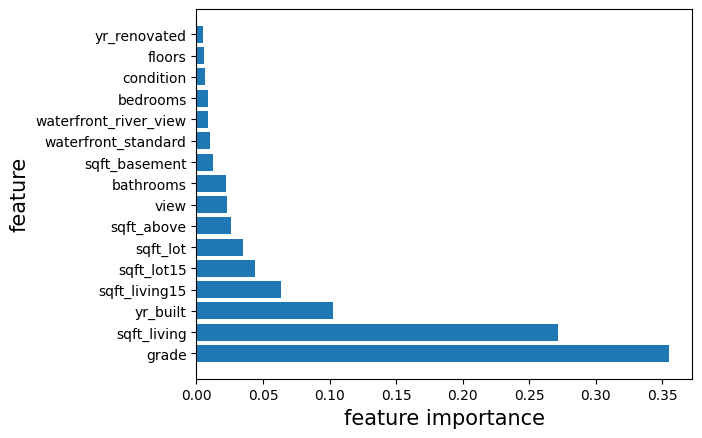

In [22]:
plt.barh(feature_importances['col_name'], feature_importances['feature_importance'], align = 'center')
plt.xlabel('feature importance', size = 15)
plt.ylabel('feature', size = 15)
plt.show()

In [ ]:
# 의사결정나무 기반(배깅, 부스팅, 랜던포레스트) 알고리즘은 회귀계수를 직접 추출 X > 설명력은 낮지만 > 정확도는 높다.

In [ ]:
# 배깅(분류)

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

credit = pd.read_csv("data/credit_final.csv")
X = credit[credit.columns.difference(['credit.rating'])]
y = credit[['credit.rating']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)
X_train.head()

,account.balance,age,apartment.type,bank.credits,credit.amount,credit.duration.months,credit.purpose,current.assets,dependents,employment.duration,foreign.worker,guarantor,installment.rate,marital.status,occupation,other.credits,previous.credit.payment.status,residence.duration,savings,telephone
133,3,26,2,1,1453,18,3,1,1,1,1,1,3,1,3,2,2,1,1,1
464,2,24,1,1,7472,12,4,1,1,1,1,1,1,1,1,2,2,2,4,1
919,1,46,3,2,6331,48,1,4,1,4,1,1,4,3,3,2,3,4,1,2
865,3,39,3,2,1271,15,3,4,1,2,1,1,3,3,3,2,3,4,4,2
352,3,46,2,2,7629,48,4,3,2,4,1,1,4,1,4,1,3,2,4,1


In [29]:
from sklearn.tree import DecisionTreeClassifier # 결정트리
from sklearn.ensemble import BaggingClassifier # 배깅

# 분류기 100개 생성, 샘플의 100%(복원추출)와 컬럼 모두의 무작위 하위 집합을 기반으로 함
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), 
                        n_estimators=100, max_samples=1.0, 
                        max_features=1.0)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("accuracy_score : ", clf.score(X_test, y_test))

accuracy_score :  0.7566666666666667


/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
from sklearn.metrics import confusion_matrix # 오차행렬
# 정밀도, 재현율, F1 스코어 : f1_score(test_y, pred)로 사용
from sklearn.metrics import precision_score, recall_score, f1_score 

# 오차행렬
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['True[0]', 'True[1]'],
             columns=['Pred[0]','Pred[1]'])

,Pred[0],Pred[1]
True[0],48,49
True[1],24,179


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


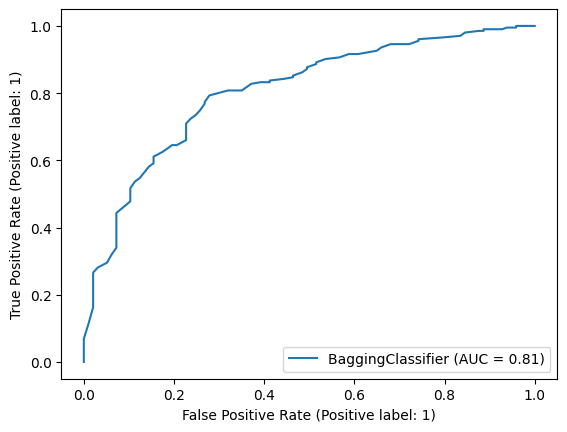

roc_auc_score : 0.8050632268549083


In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score

plot_roc_curve(clf, X_test, y_test)
plt.show()

print("roc_auc_score :", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

In [32]:
# OOB > ROC_AUC X > 얼마나 False 모른다 > 홀드아웃, CV로 주로 사용 
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), 
                        n_estimators=100, 
                        max_samples=1.0, max_features=1.0, 
                        oob_score=True)
clf = clf.fit(X, y)
clf.oob_score_

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.756

In [33]:
## 변수의 중요도 확인

import numpy as np
importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in clf.estimators_], axis=0))
feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis=1)
feature_importances.columns=["col_name","feature_importance"]
feature_importances

,col_name,feature_importance
0,account.balance,0.129141
1,age,0.115043
2,apartment.type,0.019153
3,bank.credits,0.014340
4,credit.amount,0.178061
5,credit.duration.months,0.110732
6,credit.purpose,0.046135
7,current.assets,0.048546
8,dependents,0.011234
9,employment.duration,0.042934


In [34]:
feature_importances = feature_importances.sort_values(by="feature_importance",ascending=False).reset_index(drop=True)
feature_importances

,col_name,feature_importance
0,credit.amount,0.178061
1,account.balance,0.129141
2,age,0.115043
3,credit.duration.months,0.110732
4,current.assets,0.048546
5,savings,0.047052
6,previous.credit.payment.status,0.046874
7,credit.purpose,0.046135
8,employment.duration,0.042934
9,residence.duration,0.040896


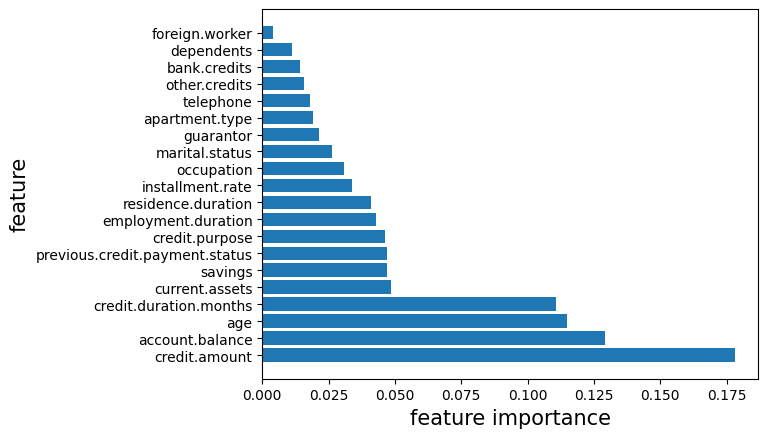

In [35]:
import matplotlib.pyplot as plt


plt.barh(feature_importances["col_name"], feature_importances["feature_importance"], align='center')

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

In [37]:
# * 변수의 상대적 중요도를 보았을 때, Credit Amount, Account Balance, age, Duration of Credit (month) 순으로 변수 중요도가 큰 것을 파악할 수 있음
# 추후 이러한 내용을 가지고 어떻게 활용할 수 있겠냐?